In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [16, 10]


In [2]:
train = pd.read_csv("C:/Users/cheolwon/Documents/Kaggle/new_york_taxi/train.csv", header = 0)
test = pd.read_csv("C:/Users/cheolwon/Documents/Kaggle/new_york_taxi/test.csv", header = 0)

train.fillna(0)
test.fillna(0)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


In [3]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


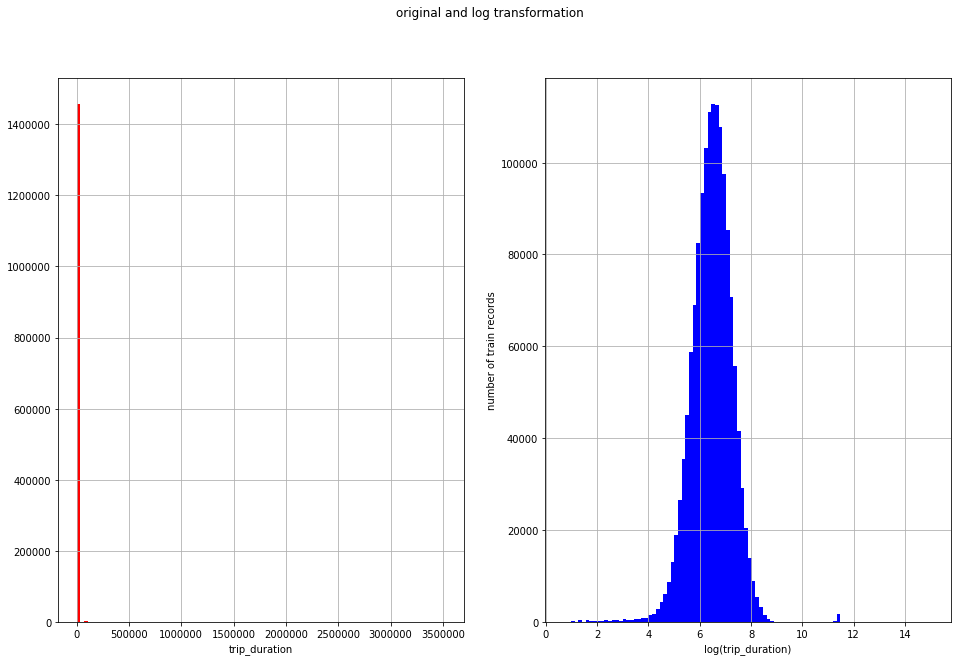

In [5]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

plt.figure(1)
plt.suptitle('original and log transformation')
# 로그변환 전
plt.subplot(121)
plt.hist(train['trip_duration'].values, bins = 100, color='r')
plt.grid()
plt.xlabel('trip_duration')

# 로그변환 후
plt.subplot(122)
plt.hist(train['log_trip_duration'].values, bins = 100, color='b')
plt.grid()
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [18]:
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
print(plot_vendor)

vendor_id
1     845.438244
2    1058.643164
Name: trip_duration, dtype: float64


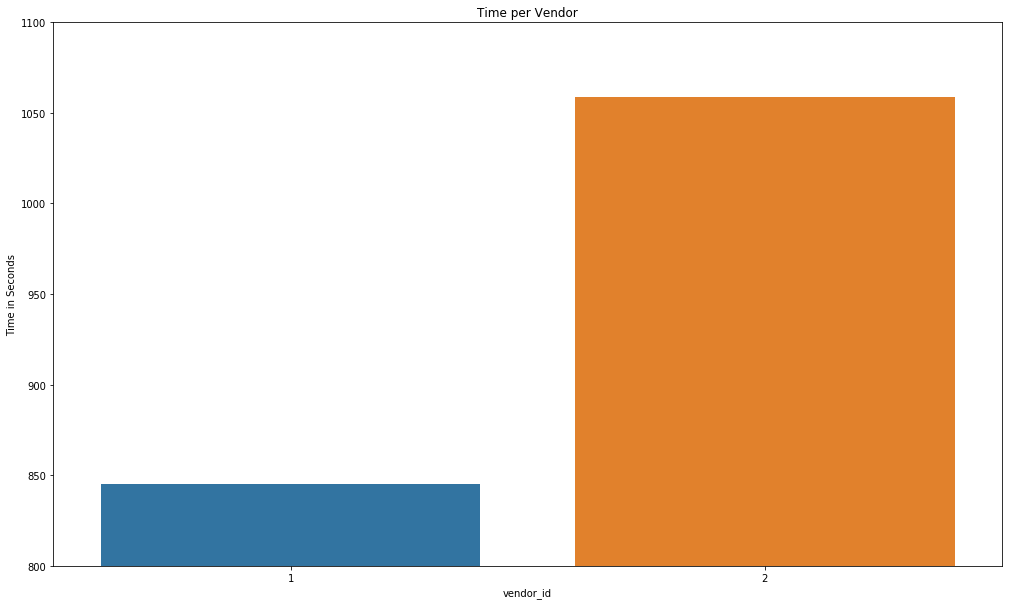

In [19]:
import warnings
warnings.filterwarnings("ignore")

plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=1100)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
plt.show()

c:\users\cheolwon\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


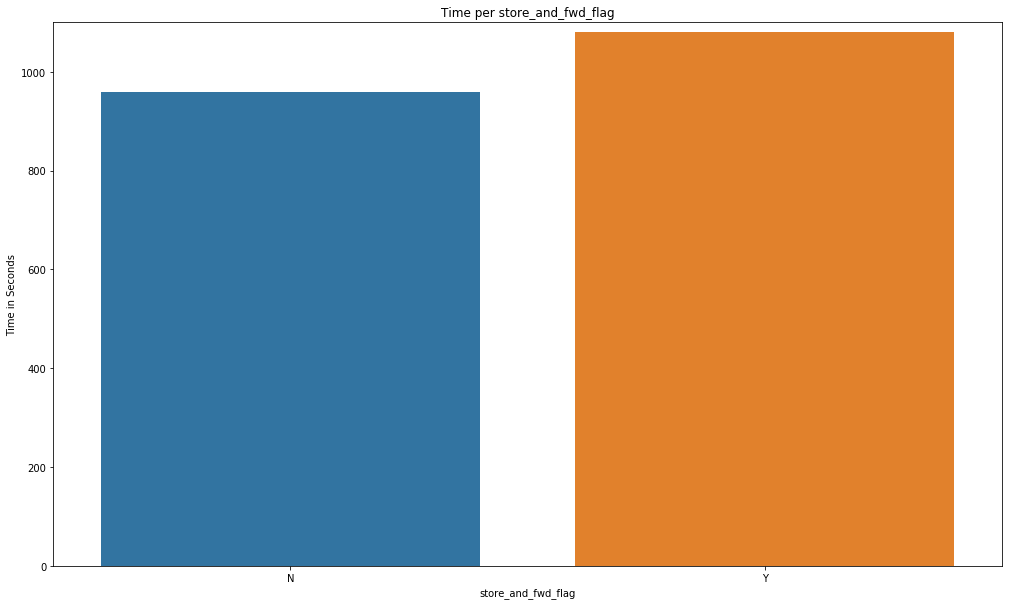

In [13]:
snwflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()


plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(snwflag.index,snwflag.values)
plt.show()

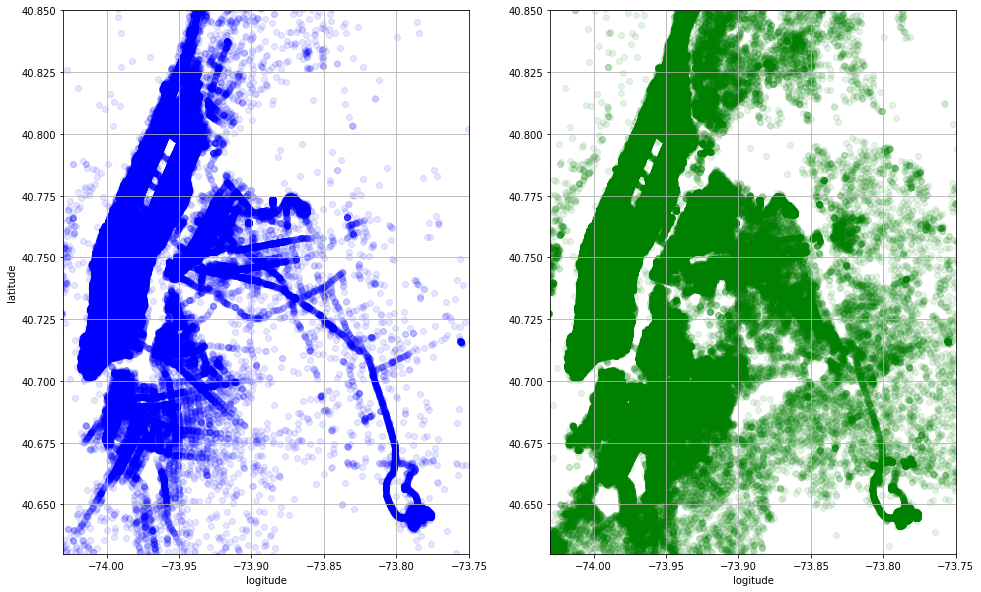

In [8]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(1)
plt.subplot(121)
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], 
            marker = 'o', color='blue', label='pick_up', alpha=0.1)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel('logitude')
plt.ylabel('latitude')
plt.grid()

plt.subplot(122)
plt.scatter(train['dropoff_longitude'], train['dropoff_latitude'], 
            marker = 'o', color='green', label='drop_off', alpha=0.1)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel('logitude')
plt.grid()
plt.show()

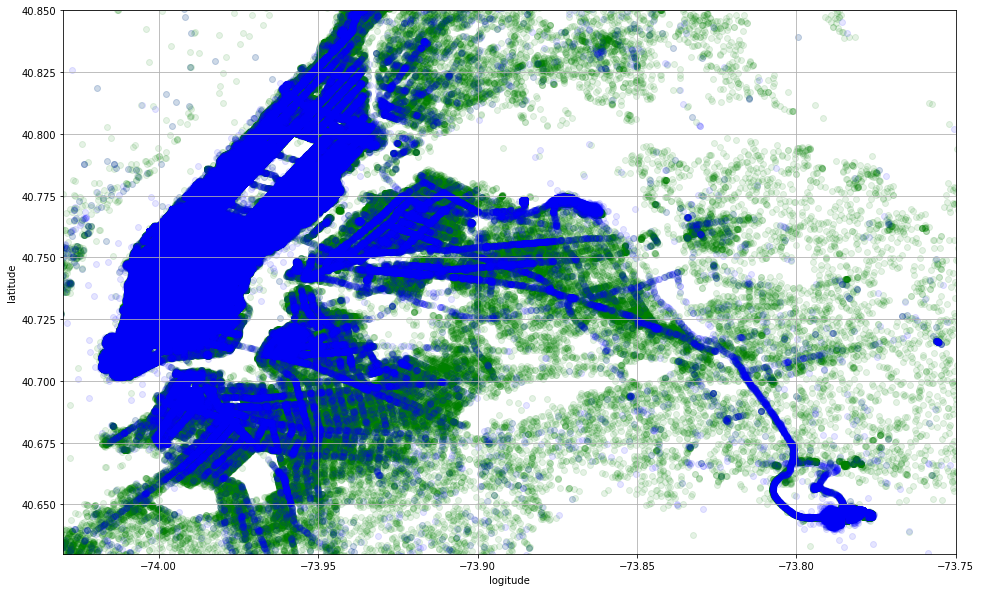

In [64]:

plt.figure(2)
plt.scatter(train['dropoff_longitude'], train['dropoff_latitude'], 
            marker = 'o', color='green', label='drop_off', alpha=0.1)
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], 
            marker = 'o', color='blue', label='pick_up', alpha=0.1)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.xlabel('logitude')
plt.ylabel('latitude')
plt.grid()
plt.show()

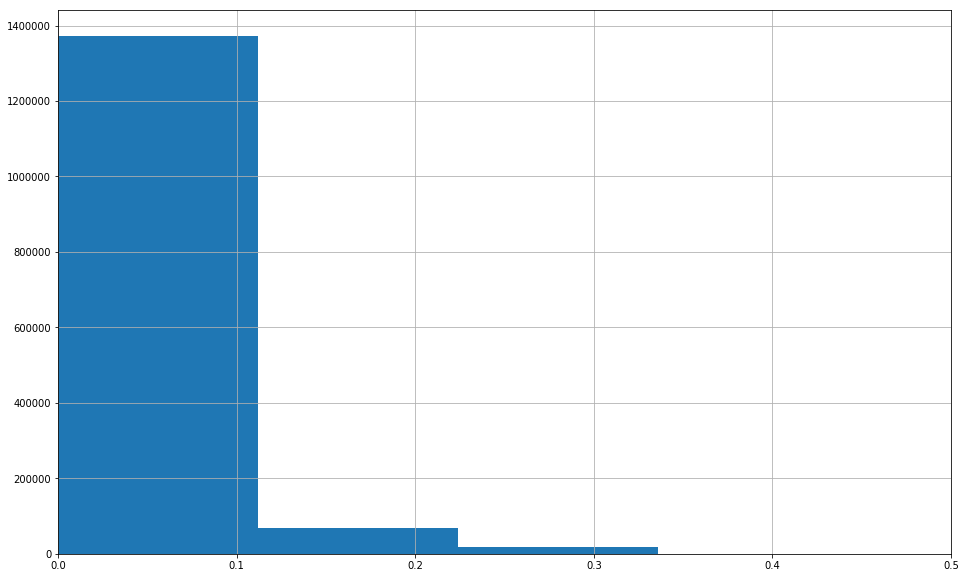

In [8]:
# distance between pickup and dropoff place
train['distance']=np.sqrt(( (train['pickup_longitude'] - train['dropoff_longitude'])**2 ) 
                              + ((train['pickup_latitude'] - train['dropoff_latitude'])**2)) 
test['distance']=np.sqrt(( (test['pickup_longitude'] - test['dropoff_longitude'])**2 ) 
                             + ((test['pickup_latitude'] - test['dropoff_latitude'])**2)) 

plt.hist(train['distance'], bins = 100)
plt.xlim((0, 0.5))
plt.grid()
plt.show()

In [5]:
# K-means Clustering
pickup = pd.concat([train['pickup_longitude'], train['pickup_latitude']], axis=1)
dropoff = pd.concat([train['dropoff_longitude'], train['dropoff_latitude']], axis=1)

k_means = KMeans(init='k-means++', n_clusters=20, n_init=10)
t0 = time.time()
kmeans_fit_1 = k_means.fit(pickup)
kmeans_fit_2 = k_means.fit(dropoff)
t_batch = time.time() - t0
print(t_batch)

In [6]:
pred_pick = kmeans_fit_1.predict(pickup)
pred_drop = kmeans_fit_2.predict(dropoff)

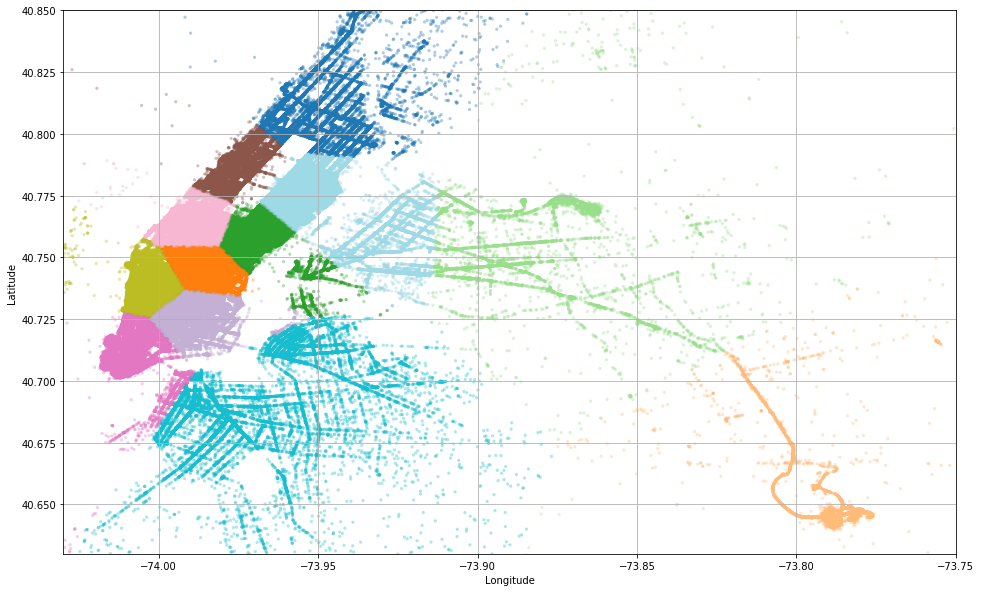

In [38]:

plt.scatter(train['pickup_longitude'], train['pickup_latitude'], s=10, lw=0,
           c=pred_pick, cmap='tab20', alpha=0.2)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

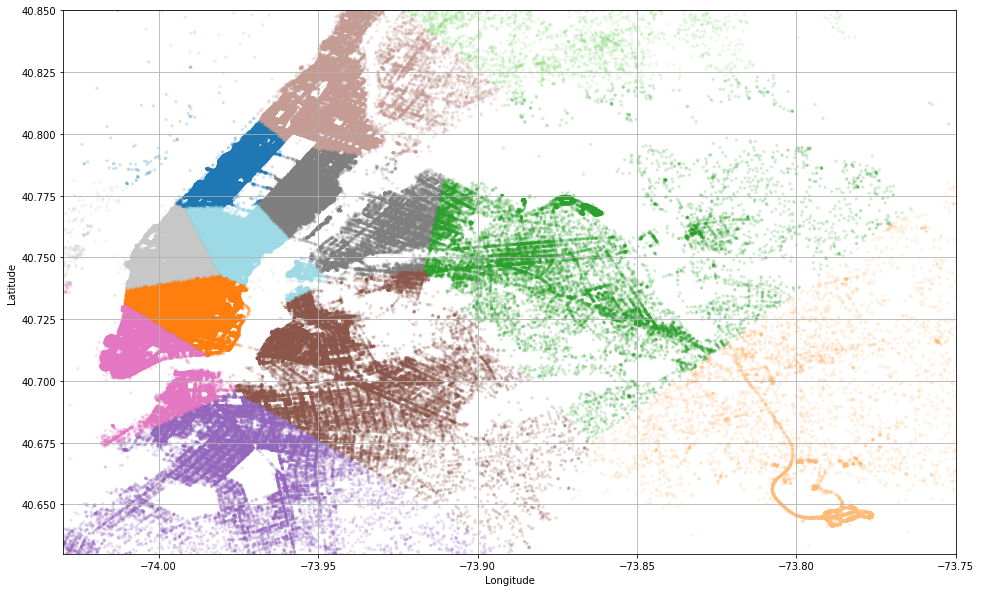

In [9]:
plt.scatter(train['dropoff_longitude'], train['dropoff_latitude'], s=10, lw=0,
           c=pred_drop, cmap='tab20', alpha=0.2)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()